In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# first find which lines are headings.
def read_log_startline(file_name):
    with open(file_name, 'r') as log_file:
        data_lines = []
        for i, line in enumerate(log_file.readlines()):
            log_line = line.split()
            data_lines.append(log_line)
            try:
                if log_line[0] == '1':
                    start_line = i
                    print ('data start line is:', i)      
            except:
                pass
    return data_lines, start_line

# check whether load and travel are in the data headins line
def load_travel_findcolumn(heading_line):
    try:
       for i, head in enumerate(heading_line):
            if head.lower() == 'load':
                load_col = i
                print ('load col was found')
            elif head.lower() == 'travel':
                travel_col = i
                print ('travel col was found')
            else:
                print (head, 'is not used')
    except:
        print ('load and travel were not found') 
    return (load_col, travel_col)

# extract Load and Travels variables in np array
def extract_loads_travels(data_lines):
    loads = []
    travels = []
    for line in data_lines:
        load = float(line[load_col])
        travel = float(line[travel_col])
        loads.append(load)
        travels.append(travel)
    
    loads = np.array(loads)
    travels = np.array(travels)
    return (loads, travels)

['2.log', '3.log', '4.log', '1.log', '5.log']
data start line is: 6
Reading is not used
load col was found
travel col was found
Time is not used
data start line is: 6
Reading is not used
load col was found
travel col was found
Time is not used
data start line is: 6
Reading is not used
load col was found
travel col was found
Time is not used
data start line is: 6
Reading is not used
load col was found
travel col was found
Time is not used
data start line is: 6
Reading is not used
load col was found
travel col was found
Time is not used


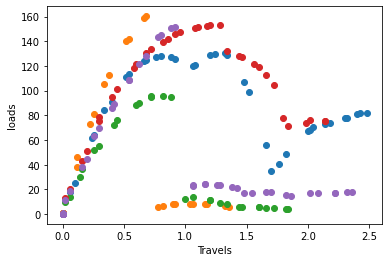

In [3]:
log_files = []
for file in os.listdir("./"):
    if file.endswith(".log"):
        log_files.append(file)
print (log_files)

for file_name in log_files:
    data_lines, start_line = read_log_startline (file_name=file_name)
    heading_line = data_lines [start_line-1]
    load_col, travel_col = load_travel_findcolumn(heading_line=heading_line)
    data_lines = data_lines [start_line:]
    loads, travels = extract_loads_travels (data_lines=data_lines)
    plt.scatter(travels, loads)
    
plt.xlabel('Travels')
plt.ylabel('loads')
plt.show()
